In [2]:
#  Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
#  Mount Google Drive
from google.colab import drive
import os

drive.mount('/content/drive')

# Set paths
BASE_DIR = "/content/drive/MyDrive/NEU Metal Surface Defects Data 2"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
VAL_DIR = os.path.join(BASE_DIR, "valid")
TEST_DIR = os.path.join(BASE_DIR, "test")


Mounted at /content/drive


In [4]:
#  Set Parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32
EPOCHS = 10


In [5]:
#  Load Data from Directory
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_gen = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 1666 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [6]:
#  Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#  Train the Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 539s 10s/step - accuracy: 0.2034 - loss: 2.0289 - val_accuracy: 0.3194 - val_loss: 1.6619
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.3686 - loss: 1.5276 - val_accuracy: 0.6806 - val_loss: 1.0904
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.5088 - loss: 1.2585 - val_accuracy: 0.6806 - val_loss: 0.7855
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.6744 - loss: 0.8472 - val_accuracy: 0.8194 - val_loss: 0.6480
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.7691 - loss: 0.6160 - val_accuracy: 0.8333 - val_loss: 0.4749
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8358 - loss: 0.5071 - val_accuracy: 0.9028 - val_loss: 0.3009
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.8617 - loss: 0.4270 - val_accuracy: 0.9583 - val_loss: 0.1976
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8803 - loss: 0.3583 - val_accuracy: 0.916

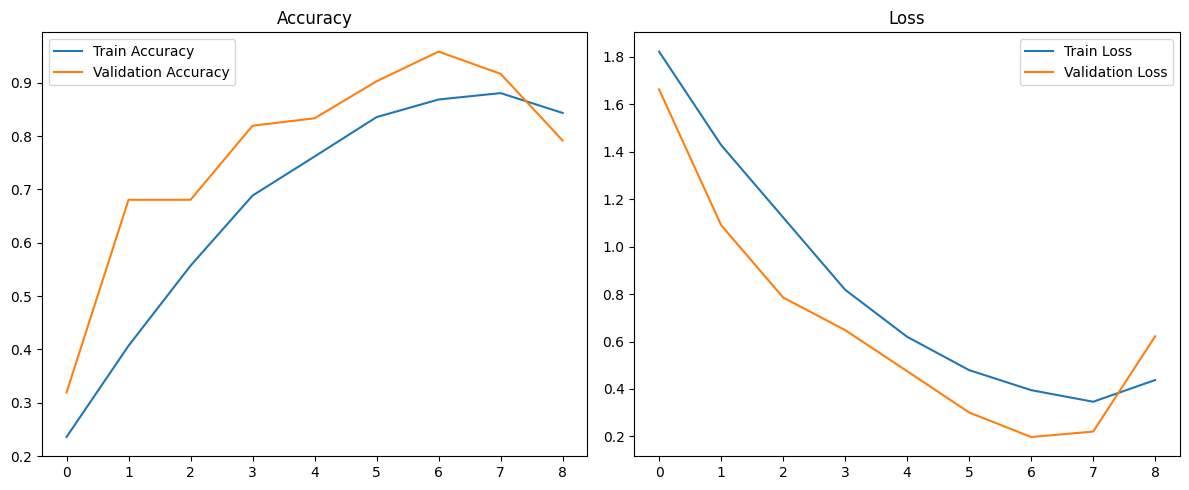

In [8]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


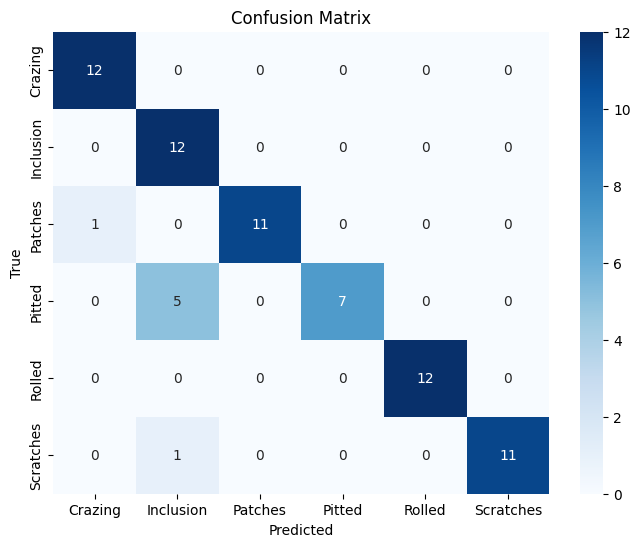

Classification Report:
              precision    recall  f1-score   support

     Crazing       0.92      1.00      0.96        12
   Inclusion       0.67      1.00      0.80        12
     Patches       1.00      0.92      0.96        12
      Pitted       1.00      0.58      0.74        12
      Rolled       1.00      1.00      1.00        12
   Scratches       1.00      0.92      0.96        12

    accuracy                           0.90        72
   macro avg       0.93      0.90      0.90        72
weighted avg       0.93      0.90      0.90        72



In [9]:
#  Evaluate on Test Set
test_gen.reset()
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
y_true = test_gen.classes
labels = list(test_gen.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))
